In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
import os

path = os.path.join("dataset", "train.csv")

In [19]:
data = pd.read_csv(path)
data.head(3)

C:\Users\admin\AppData\Local\Temp\ipykernel_10852\3246910183.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0


In [20]:
data.shape

(110938, 190)

In [21]:
data.dropna(inplace= True)
data.shape

(64117, 190)

# Features in original dataset

In [22]:
for i in data.columns:
    print(i)

id
target
home_team_name
away_team_name
match_date
league_name
league_id
is_cup
home_team_coach_id
away_team_coach_id
home_team_history_match_date_1
home_team_history_match_date_2
home_team_history_match_date_3
home_team_history_match_date_4
home_team_history_match_date_5
home_team_history_match_date_6
home_team_history_match_date_7
home_team_history_match_date_8
home_team_history_match_date_9
home_team_history_match_date_10
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup

In [23]:
data = data.drop(columns= ["home_team_name", "away_team_name", "league_name"])

In [24]:
print(data.isna().sum().value_counts)

<bound method IndexOpsMixin.value_counts of id                                0
target                            0
match_date                        0
league_id                         0
is_cup                            0
                                 ..
away_team_history_league_id_6     0
away_team_history_league_id_7     0
away_team_history_league_id_8     0
away_team_history_league_id_9     0
away_team_history_league_id_10    0
Length: 187, dtype: int64>


<AxesSubplot:xlabel='target', ylabel='Count'>

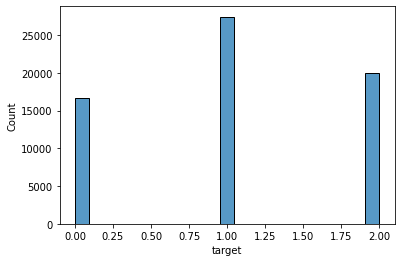

In [25]:
# "target" to categorial ['away' = 2, 'home' = 1, 'draw' = 0]

data["target"] = np.where(data["target"] == "away", 2, data["target"])
data["target"] = np.where(data["target"] == "home", 1, data["target"])
data["target"] = np.where(data["target"] == "draw", 0, data["target"])

sns.histplot(data= data["target"])

In [26]:
train_set = data[['target',
'home_team_history_rating_1',
 'home_team_history_rating_2',
 'home_team_history_rating_3',
 'home_team_history_rating_4',
 'home_team_history_rating_5',
 'home_team_history_rating_6',
 'home_team_history_rating_7',
 'home_team_history_rating_8',
 'home_team_history_rating_9',
 'home_team_history_rating_10',
'away_team_history_rating_1',
 'away_team_history_rating_2',
 'away_team_history_rating_3',
 'away_team_history_rating_4',
 'away_team_history_rating_5',
 'away_team_history_rating_6',
 'away_team_history_rating_7',
 'away_team_history_rating_8',
 'away_team_history_rating_9',
 'away_team_history_rating_10']]

# Models try

In [32]:
from sklearn.model_selection import train_test_split

y = train_set['target']
y = y.astype('int') # it's important

X = train_set.drop(columns= ['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state= 76)

In [33]:
y_train.unique()

array([1, 0, 2])

In [37]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import NearestNeighbors

r_state = 76
models = [AdaBoostClassifier(random_state= r_state), RandomForestClassifier(random_state= r_state), GradientBoostingClassifier()]

In [38]:
for i in models:
    i.fit(X_train, y_train)

In [42]:
results = pd.DataFrame(columns= ['Model', 'Score'])


for i in models:
    
    row = [ i, i.score(X_test, y_test)]
    results.loc[len(results)] = row

results

,Model,Score
0,"(DecisionTreeClassifier(max_depth=1, random_st...",0.472655
1,"(DecisionTreeClassifier(max_features='auto', r...",0.462154
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.477022
